<a href="https://colab.research.google.com/github/preethimolsilastin/seizure-type-classification-tuh/blob/master/preethimolsilastin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline("/content/drive/MyDrive/dataset/train/archana")
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 20 image(s) found.
Output directory set to /content/drive/MyDrive/dataset/train/archana/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7F79B6FBB390>: 100%|██████████| 100/100 [00:01<00:00, 58.10 Samples/s]


In [29]:
p = Augmentor.Pipeline("/content/drive/MyDrive/dataset/train/preethi")
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 20 image(s) found.
Output directory set to /content/drive/MyDrive/dataset/train/preethi/output.

Processing <PIL.Image.Image image mode=1 size=1503x1600 at 0x7F79B2292150>: 100%|██████████| 100/100 [00:22<00:00,  4.49 Samples/s]


In [30]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [31]:
train_dir="/content/drive/MyDrive/dataset/train"
val_dir="/content/drive/MyDrive/dataset/test"

In [32]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=1,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=1,seed=42)

Found 440 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [33]:
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid")
                                    
                                    
                                    
])

In [34]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

In [35]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [36]:
history_1=model_1.fit(train_data,
                      epochs=50,
                      steps_per_epoch=50,
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/50
50/50 [==============================] - 6s 111ms/step - loss: 0.7046 - accuracy: 0.5000 - val_loss: 0.6825 - val_accuracy: 0.7368
Epoch 2/50
50/50 [==============================] - 5s 108ms/step - loss: 0.6926 - accuracy: 0.6400 - val_loss: 0.6892 - val_accuracy: 0.7895
Epoch 3/50
50/50 [==============================] - 5s 106ms/step - loss: 0.6916 - accuracy: 0.6200 - val_loss: 0.6855 - val_accuracy: 0.4737
Epoch 4/50
50/50 [==============================] - 5s 107ms/step - loss: 0.6864 - accuracy: 0.6800 - val_loss: 0.6697 - val_accuracy: 0.7895
Epoch 5/50
50/50 [==============================] - 5s 102ms/step - loss: 0.6808 - accuracy: 0.6800 - val_loss: 0.6385 - val_accuracy: 0.9474
Epoch 6/50
50/50 [==============================] - 5s 102ms/step - loss: 0.6557 - accuracy: 0.7800 - val_loss: 0.5764 - val_accuracy: 0.9474
Epoch 7/50
50/50 [==============================] - 5s 101ms/step - loss: 0.7066 - accuracy: 0.6600 - val_loss: 0.6881 - val_accuracy: 0.5263
Epoch 

In [48]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  
  print(val)
  print(val[[0]])
  if val>=0.5:
    plt.xlabel("archana",fontsize=30)
  elif val<0.5:
    plt.xlabel("preethi",fontsize=30)

[[0.8610115]]
[[0.8610115]]


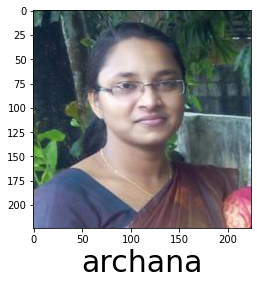

In [49]:
predictImage("/content/drive/MyDrive/dataset/train/archana/IMG-20150718-WA0044.jpg")

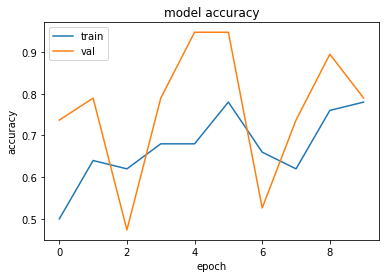

In [52]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

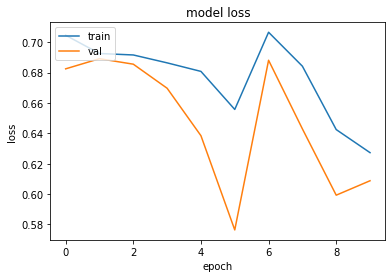

In [53]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [54]:
model_2=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid")])

In [55]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [56]:
history_2=model_2.fit(train_data,
                      epochs=50,
                      steps_per_epoch=50,
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/50
50/50 [==============================] - 6s 109ms/step - loss: 0.9494 - accuracy: 0.5400 - val_loss: 0.6618 - val_accuracy: 0.6842
Epoch 2/50
50/50 [==============================] - 5s 103ms/step - loss: 0.6542 - accuracy: 0.7200 - val_loss: 0.6106 - val_accuracy: 0.8421
Epoch 3/50
50/50 [==============================] - 5s 107ms/step - loss: 0.6183 - accuracy: 0.6600 - val_loss: 0.6377 - val_accuracy: 0.5789
Epoch 4/50
50/50 [==============================] - 5s 106ms/step - loss: 0.5443 - accuracy: 0.7400 - val_loss: 0.4628 - val_accuracy: 0.7895
Epoch 5/50
50/50 [==============================] - 5s 104ms/step - loss: 0.6468 - accuracy: 0.6600 - val_loss: 0.4896 - val_accuracy: 0.8421
Epoch 6/50
50/50 [==============================] - 5s 103ms/step - loss: 0.4796 - accuracy: 0.8800 - val_loss: 0.4656 - val_accuracy: 0.8947
Epoch 7/50
50/50 [==============================] - 5s 107ms/step - loss: 0.3497 - accuracy: 0.8600 - val_loss: 0.6559 - val_accuracy: 0.7368
Epoch 

In [57]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_2.predict(X)
  
  print(val)
  #print(val[[0]])
  if val>=0.5:
    plt.xlabel("preethi",fontsize=30)
  elif val<0.5:
    plt.xlabel("archana",fontsize=30)

[[1.]]


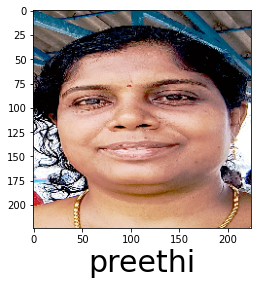

In [58]:
predictImage("/content/drive/MyDrive/dataset/train/preethi/1658121944642.jpg")

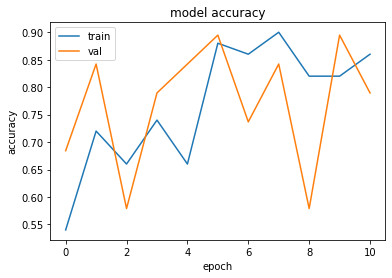

In [59]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


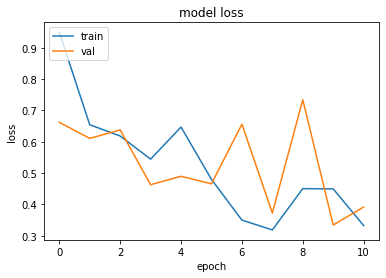

In [60]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()